In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from pandas_profiling import ProfileReport

# classes for special types
from pandas.api.types import CategoricalDtype

# Apply the default theme
sns.set_theme()

In [2]:
%matplotlib inline
# should enable plotting without explicit call .show()

%load_ext pretty_jupyter

# Data Understanding

## Motivation

> **Toxicomania** is by definition of WHO the state of periodic or chronic intoxication harming either the individual or society caused by the repeated usage of drugs of either natural or synthetic origin. One of the characteristic signs is the desire to use a drug, acquire it by any means necessary, tendency to raise dosage and psychological or physical addiction.

We analyse a portion of Geodata to find out how drug related crimes is related to information about the demographic in Czech Republic.

## Data Overview

We will work with data from two files.

The file ``geodata/kriminalita/kriminalita_obce.csv`` provides data about the criminality in individual municipalities and the file ``geodata/census11_21/data_obce_vyhl_nevyhl.csv`` provides information from the census in years 2011 and 2021 at the level of municipalities.

In [3]:
# Reading and inspecting data
census = pd.read_csv("geodata/census11_21/data_obce_vyhl_nevyhl.csv")
census.head(10)

,deti_0_2021,deti_1_2021,deti_2_2021,deti_3_2021,deti_4_2021,deti_5_vice_2021,deti_nezj_2021,domy_mat_drevo_2021,domy_mat_kamen_cihly_2021,domy_mat_nep_cihly_2021,...,domy_obd_1919_vyhl_2021,rod_stav_rozv_vyhl_mean,vzdelani_zakl_vyhl_mean,rod_stav_zen_vdana_vyhl_mean,vzdelani_str_np_vyhl_mean,vzdelani_vys_vyhl_mean,vira_ateisti_vyhl_mean,vek_80_inf_vyhl_mean,domy_vlast_obec_stat_vyhl_mean,domy_vlast_fyz_vyhl_mean
0,0.194969,0.143396,0.488050,0.137107,0.021384,0.003774,0.011321,0.014563,0.747573,0.033981,...,0.050933,0.079269,0.159838,0.469874,0.301549,0.136773,0.252840,0.046476,0.007826,0.933068
1,0.182711,0.133595,0.469548,0.157171,0.025540,0.013752,0.017682,0.029255,0.832447,0.005319,...,0.124698,0.110360,0.214232,0.427795,0.264118,0.067960,0.421514,0.048938,0.012675,0.885312
2,0.176471,0.130560,0.486370,0.157819,0.024390,0.014347,0.010043,0.021583,0.839928,0.014388,...,0.090220,0.072670,0.150376,0.467355,0.293469,0.113221,0.348422,0.039416,0.007133,0.949413
3,0.202192,0.114495,0.455542,0.154689,0.043849,0.015834,0.013398,0.052381,0.838095,0.000000,...,0.032733,0.074615,0.147057,0.435202,0.306871,0.114566,0.281049,0.033192,0.007011,0.960576
4,0.190068,0.163527,0.511130,0.106164,0.009418,0.005993,0.013699,0.017104,0.873432,0.010262,...,0.029247,0.072489,0.140181,0.500485,0.298707,0.238190,0.384335,0.041478,0.003325,0.974288
5,0.271262,0.204183,0.391162,0.092598,0.016823,0.006661,0.017311,0.011139,0.778656,0.026020,...,0.107570,0.126766,0.119557,0.369177,0.332195,0.237760,0.424379,0.043079,0.018776,0.728313
6,0.192601,0.159956,0.463547,0.141458,0.023939,0.007617,0.010881,0.016575,0.751381,0.088398,...,0.096836,0.085831,0.149602,0.445130,0.297130,0.115618,0.380851,0.032254,0.001970,0.970868
7,0.171739,0.150000,0.447826,0.180435,0.032609,0.006522,0.010870,0.014675,0.605870,0.138365,...,0.179142,0.075651,0.189432,0.468105,0.258048,0.088204,0.376325,0.046083,0.010787,0.946255
8,0.184314,0.145098,0.466667,0.145098,0.047059,0.007843,0.003922,0.027778,0.694444,0.148148,...,0.124482,0.082544,0.148868,0.463051,0.280034,0.103206,0.358417,0.028461,0.005710,0.949889
9,0.199020,0.123529,0.495098,0.135294,0.023529,0.007843,0.015686,0.015444,0.770914,0.074646,...,0.096667,0.080210,0.148408,0.463686,0.324817,0.156932,0.389550,0.039334,0.006919,0.947067


In [4]:
crimi = pd.read_csv("geodata/kriminalita/kriminalita_obce.csv")
crimi.head(10)

,OBEC_KOD,p55,p62,p75,p76,p77,p78,p80,p81,p83
0,500011,0.001924,0.001242,0.004315,0.005066,0.005002,0.005665,0.002393,0.000019,0.002380
1,500020,0.002825,0.002788,0.005607,0.013802,0.010295,0.003982,0.002677,0.000028,0.002661
2,500046,0.000875,0.000038,0.001454,0.002353,0.001548,0.000904,0.000763,0.000021,0.000738
3,500062,0.001809,0.000598,0.003478,0.006979,0.006386,0.006445,0.003322,0.000556,0.002776
4,500071,0.000230,0.000036,0.002037,0.002885,0.008603,0.000863,0.000123,0.000020,0.000095
5,500101,0.001136,0.000240,0.000623,0.009662,0.001217,0.001453,0.000606,0.000102,0.000482
6,500127,0.001336,0.000306,0.000793,0.002540,0.023408,0.007654,0.000713,0.000121,0.000570
7,500135,0.001077,0.000223,0.024483,0.001926,0.009098,0.017942,0.003424,0.000097,0.003389
8,500151,0.001466,0.000354,0.000919,0.002878,0.008124,0.002190,0.000782,0.000133,0.000627
9,500160,0.002054,0.001849,0.000254,0.007556,0.012756,0.004143,0.000301,0.000050,0.000235


### Census Data

We begin by describing the census data.

Data can be organized into 11 categories. Only a selection of these categories will be used for our analysis. Each category is accompanied by a prefix by which it can be identified in the table.
   1) children (deti)
   2) houses material (domy_mat)
   3) houses time of construction / reconstruction (domy_obd)
   4) houses owner (domy_vlast)
   5) native language (jazyk)
   6) nationality (narod)
   7) citizenship (obcanstvi)
   8) marital status (rod_stav)
   9) age (vek) - either the combined age of men and women, or with the ability to subdivide into only men (vek_muzi) or only women (vek_zeny)
   10) religion (vira)
   11) education (vzdelani)

The format of column names can be described by ``<category>_<subcategory>_(vyhl)?_(2011|2021|mean|diff)`` with
   - **category** - main category
   - **subcategory** - category can be further specified
   - *vyhl* - whether the feature has been smoothed
   - *2011 | 2021* - from which census have the data been collected
   - *mean | diff* - if the data is an agragate from both censuses, whether it is their mean or difference

We will restrict ourselves only on the **marital status, age, religion** and **education** categories. We will also drop the ``diff`` category for data from multiple censuses and work only with means.

The most relevant columns for our purpouses are:
- **OBEC_KOD** - code of municipality
- **OBEC_NAZEV** - name of the municipality


Columns related to marital status:
- **rod_stav_rozv_mean** - divorced
- **rod_stav_svob_mean** - unmarried
- **rod_stav_vdov_mean** - widow/widower
- **rod_stav_zen_vdana_mean** - married

Columns related to *age*:
- **vek_0_14_mean** - age 0 to 14
- **vek_15_19_mean** - age 15 to 19
- **vek_20_29_mean**
- **vek_30_39_mean**
- **vek_40_49_mean**
- **vek_50_59_mean**
- **vek_60_64_mean**
- **vek_65_69_mean**
- **vek_70_79_mean**
- **vek_80_inf_mean** - age 80 and more

Columns related to religion:
- **vira_ateisti_mean** - atheists
- **vira_evangelici_mean** - _Českobratrská církev evangelická_
- **vira_hlasici_mean** - religious
- **vira_husiti_mean** - _Církev Československá husitská_
- **vira_katolici_mean** - _Církev římskokatolická_
- **vira_nehlasici_mean** - religious, but not associated with any society
- **vira_nezj_mean** - religion unknown

Columns related to education:
- **vzdelani_bez_mean** - no education
- **vzdelani_nezj_2021** - education unknown
- **vzdelani_str_bm_mean** - high school education (without _maturita_ state exam)
- **vzdelani_str_np_mean** - high school eduction (with _maturita_ state exam), and further education (not higher education)
- **vzdelani_vo_mean** - higher vocational education/conservatory
- **vzdelani_vys_mean** - collage degree
- **vzdelani_zakl_mean** - basic education (including unfinished)

In [5]:
# Drop unused features
census.drop(census.columns[census.columns.str.contains('vyhl')], axis=1,
            inplace=True)
census.drop(census.columns[census.columns.str.endswith('diff')], axis=1,
            inplace=True)

index_cols = census.columns.str.startswith('OBEC')
# Subdivide relevant categories into separate dataframes
age = census.loc[:,
      census.columns.str.contains('vek_') & ~census.columns.str.contains(
          'vek_muzi') & ~census.columns.str.contains('vek_zeny') | index_cols]
age.columns = age.columns.str.replace("vek_", '')
age.columns = age.columns.str.replace("_mean", '')

age_women = census.loc[:,
            census.columns.str.startswith('vek_zeny') | index_cols]
age_women.columns = age_women.columns.str.replace("vek_zeny_", '')
age_women.columns = age_women.columns.str.replace("_mean", '')

age_men = census.loc[:, census.columns.str.startswith('vek_muzi') | index_cols]
age_men.columns = age_men.columns.str.replace("vek_muzi_", '')
age_men.columns = age_men.columns.str.replace("_mean", '')

marital_status = census.loc[:,
                 census.columns.str.startswith('rod_stav') | index_cols]
religion = census.loc[:, census.columns.str.startswith('vira') | index_cols]
education = census.loc[:,
            census.columns.str.startswith('vzdelani') | index_cols]

In [6]:
age_name_map = {"0_14": "0-14", "15_19": "15-19", "20_29": "20-29",
                "30_39": "30-39", "40_49": "40-49", "50_59": "50-59",
                "60_64": "60-64", "65_69": "65-69", "70_79": "70-79",
                "80_inf": "80-INF", }
marital_status_name_map = {'rod_stav_nezj_2021': "Unknown",
                           'rod_stav_rozv_mean': "Divorced",
                           'rod_stav_svob_mean': "Unmarried",
                           'rod_stav_vdov_mean': "Widow(er)",
                           'rod_stav_zen_vdana_mean': "Married"}
religion_name_map = {'vira_ateisti_mean': "Atheist",
                     'vira_evangelici_mean': "Evangelist",
                     'vira_hlasici_mean': "Religious",
                     'vira_husiti_mean': "Husits",
                     'vira_katolici_mean': "Catholics",
                     'vira_nehlasici_mean': "No association",
                     'vira_nezj_mean': "Unknown"}
education_name_map = {'vzdelani_bez_mean': "Uneducated",
                      'vzdelani_nezj_2021': "Unknown",
                      'vzdelani_str_bm_mean': "High school (maturita)",
                      'vzdelani_str_np_mean': "High school (no maturita)",
                      'vzdelani_vo_mean': "Higher vocational",
                      'vzdelani_vys_mean': "University",
                      'vzdelani_zakl_mean': "Basic (incl. unfinished)"}

if True:
    age = age.rename(columns=age_name_map)
    marital_status = marital_status.rename(columns=marital_status_name_map)
    religion = religion.rename(columns=religion_name_map)
    education = education.rename(columns=education_name_map)

### Criminality Data

**OBEC_KOD** - code of municipality

We keep only columns p80, p81, p83. These columns contain the probability of criminal events connected with toxicomania at the level of the municipality:

- **p80** - Toxicomania
- **p81** - Forbidden production, possession and distribution drugs and poisons
- **p83** - Other forms of toxicomania including summary offence

In [7]:
crimi.drop("p55 p62 p75 p76 p77 p78 p78".split(), axis=1, inplace=True)

In [8]:
# List of crimes
crime_cats = list(crimi.columns.drop("OBEC_KOD"))

## Data Integrity

### Crimi Data Integrity

In [9]:
crimi_nrows, crimi_ncols = crimi.shape

In [10]:
%%jinja markdown
The crime dataset has {{crimi_nrows}} rows and {{crimi_ncols}} columns.

The crime dataset has 6254 rows and 4 columns.

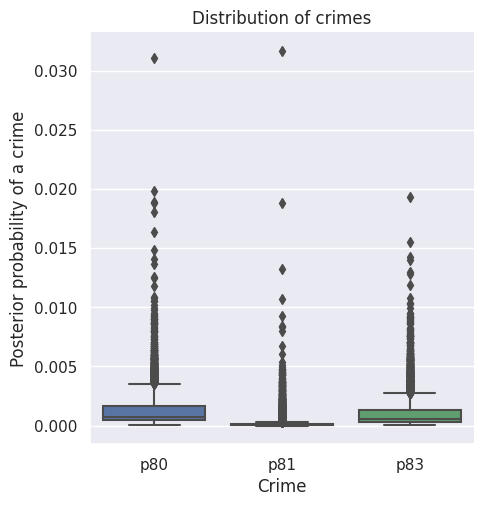

In [11]:
crimim = crimi.melt("OBEC_KOD", var_name="crime", value_name="crime_prob")
g = sns.catplot(data=crimim, x='crime', y='crime_prob', kind="box")
g.set(xlabel="Crime", ylabel="Posterior probability of a crime",
      title="Distribution of crimes");

The data seems to be highly skewed. Only a small proportion of the data gets a high number of crimes.

### Census Data Integrity

In [12]:
census_nrows, census_ncols = census.shape

In [13]:
%%jinja markdown
The census dataset has {{census_nrows}} rows and {{census_ncols}} columns.

The census dataset has 6246 rows and 91 columns.

In [14]:
"There are NaN values" if np.any(
    census.isna().sum() > 0) else "There are no NaN values"

'There are no NaN values'

The data is well prepared and there are no missing values.

#### Columns Data Types

Next we check for any unique identifiers.

In [15]:
"OBEC_KOD is a unique identifier" if census.OBEC_KOD.is_unique else "OBEC_KOD id not a unique identifier"

'OBEC_KOD is a unique identifier'

In [16]:
"OBEC_NAZEV is a unique identifier" if census.OBEC_NAZEV.is_unique else "OBEC_NAZEV is not a unique identifier"

'OBEC_NAZEV is not a unique identifier'

We see that the name of the municipality is not unique. This is true as there indeed are municipalities with the same name in Czech Republic. For example:

In [17]:
pd.value_counts(census.OBEC_NAZEV).sort_values(ascending=False).head()

Nová Ves     14
Němčice       9
Petrovice     9
Slatina       8
Vrbice        7
Name: OBEC_NAZEV, dtype: int64

In [18]:
census.dtypes

deti_0_2021           float64
deti_1_2021           float64
deti_2_2021           float64
deti_3_2021           float64
deti_4_2021           float64
                       ...   
vzdelani_vo_mean      float64
vzdelani_vys_mean     float64
vzdelani_zakl_mean    float64
OBEC_KOD                int64
OBEC_NAZEV             object
Length: 91, dtype: object

``OBEC_KOD`` is a string, ``OBEC_KOD`` is a unique identifier and all other the fields represent the posterior probability of individual subcategories and are floats. The data types, therefore, make sense.

#### Age distribution

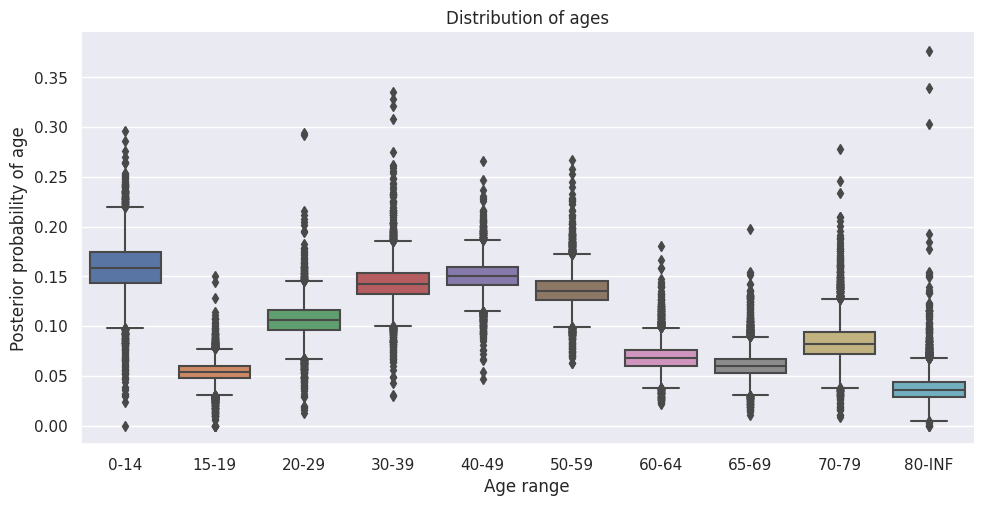

In [19]:
agem = age.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD", var_name="age_cat",
                                           value_name="age_prob")
g = sns.catplot(data=agem, x="age_cat", y="age_prob", kind='box', aspect=2)
g.set(xlabel="Age range", ylabel="Posterior probability of age",
      title="Distribution of ages");

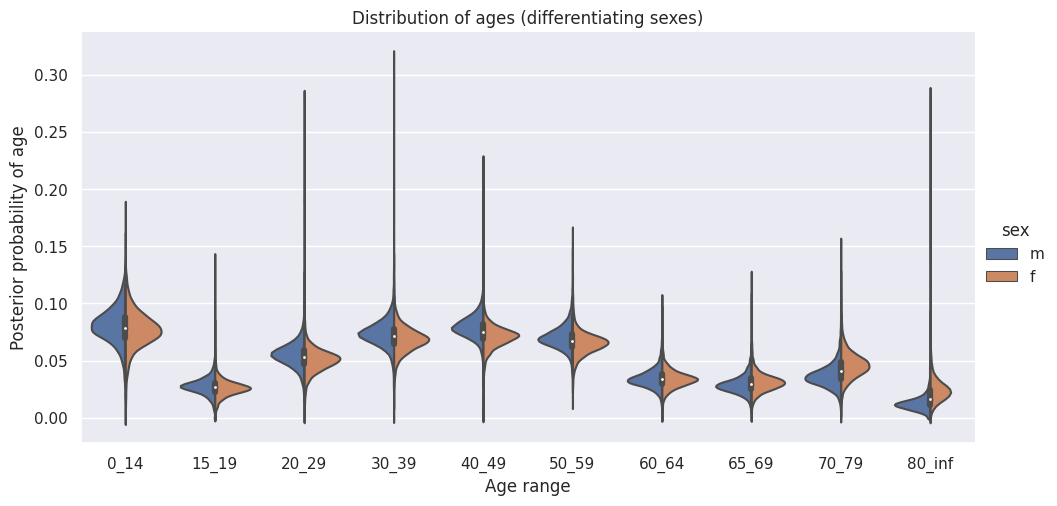

In [20]:
age_men_m = age_men.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD",
                                                    var_name="age_cat",
                                                    value_name="age_prob")
age_men_m["sex"] = 'm'
age_woman_m = age_women.drop("OBEC_NAZEV", axis=1).melt("OBEC_KOD",
                                                        var_name="age_cat",
                                                        value_name="age_prob")
age_woman_m['sex'] = 'f'
age_sex_m = pd.concat([age_men_m, age_woman_m])
g = sns.catplot(data=age_sex_m, x="age_cat", y="age_prob", hue='sex',
                kind='violin',
                split=True, aspect=2)
g.set(xlabel="Age range", ylabel="Posterior probability of age",
      title="Distribution of ages (differentiating sexes)");

The distribution of ages seems to be appropriate. There is a tendency for women to live longer, which does correspond to reality. Note that the ranges are not evenly spaced, therefore the distribution looks inflated at the first category containing children.

#### Age Relationships

**Questions**:
- Do areas with a lot of children have a higher crime rate? Or perhaps is the crime rate higher? (as parents might be trying to find ways to provide for their children)
- What about teenagers and crime rate? Do teenagers engage in illicit activities?
- Which age group is the most likely to engage in criminal activity?

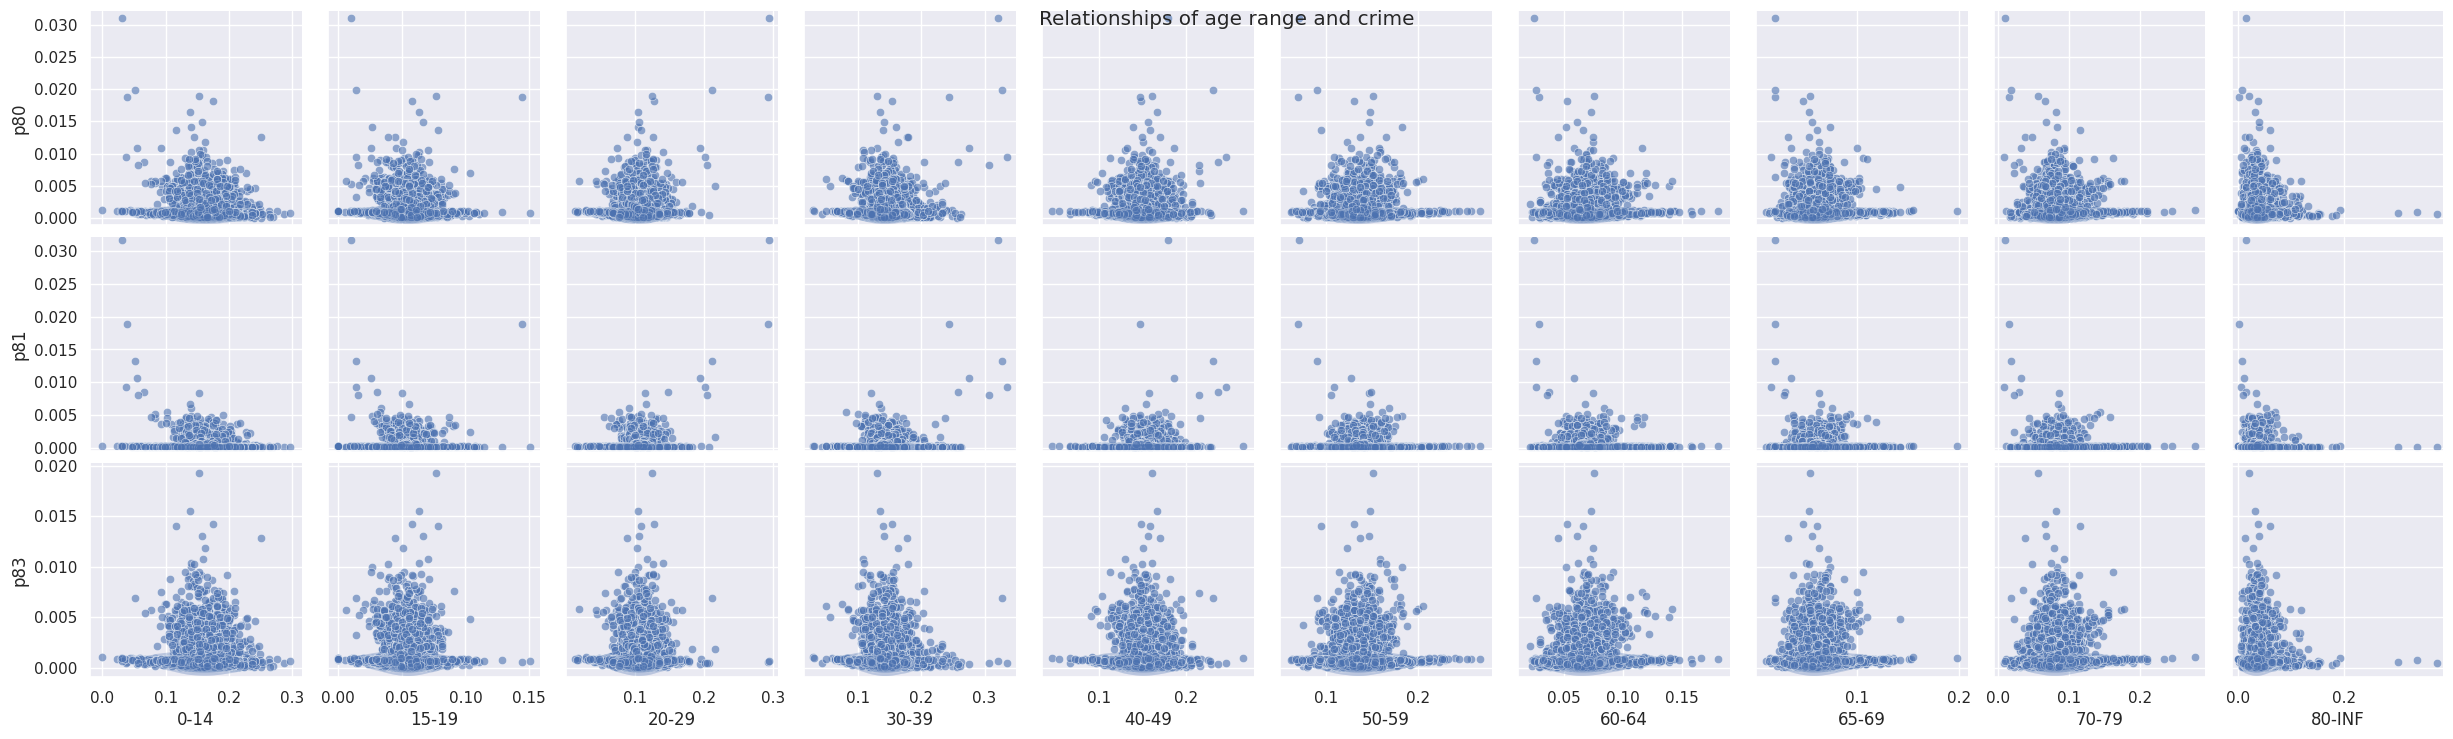

In [21]:
age_crimi_df = age.set_index('OBEC_KOD').join(crimi.set_index('OBEC_KOD')).drop(
    "OBEC_NAZEV", axis=1)
age_groups = list(age.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))
g = sns.pairplot(data=age_crimi_df, x_vars=age_groups, y_vars=crime_cats,
                 plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationships of age range and crime");

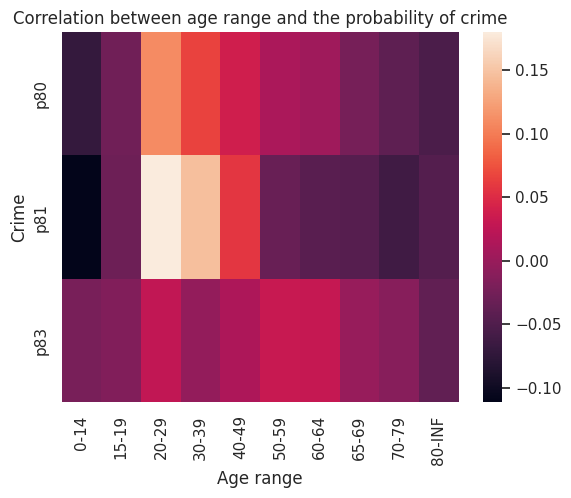

In [22]:
g = sns.heatmap(age_crimi_df.corr().loc[crime_cats][age_groups])
g.set(xlabel="Age range", ylabel="Crime",
      title="Correlation between age range and the probability of crime");

We notice a strong correlation between toxicomania and possession of illicit substances for areas with a high number of people aged 20-40 years. On the other hand areas with a lot of children have negative correlation.

#### Religion Data Distribution

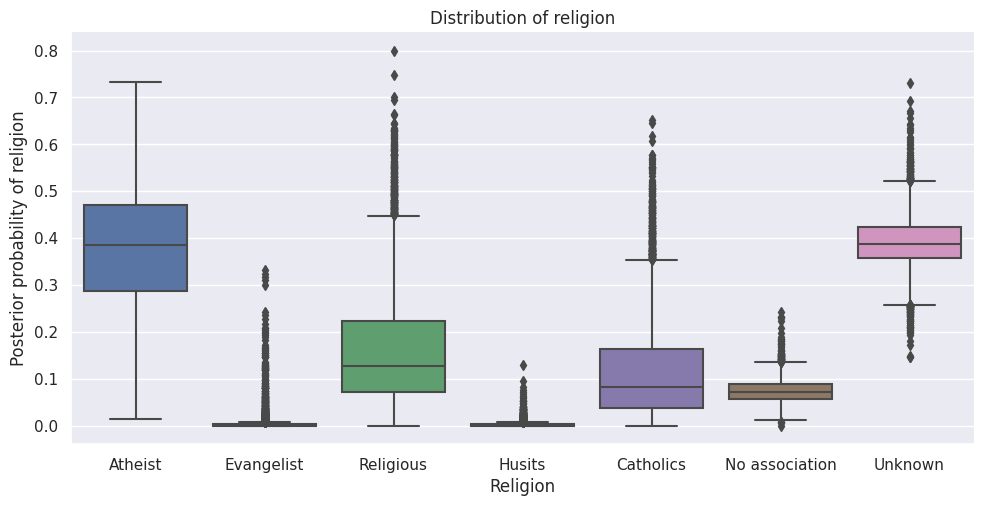

In [23]:
religion_m = religion.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                        var_name="religion",
                                                        value_name="prob")
g = sns.catplot(data=religion_m, x='religion', y='prob', kind='box', aspect=2)
g.set(xlabel="Religion", ylabel="Posterior probability of religion",
      title="Distribution of religion");

#### Religion Relationships

**Questions**:
- Are religious ares more or less likely to be criminal?
- Is atheism a predictor of criminality?
- Are there differences in the amount of criminal activity in areas dominated by different religious groups?

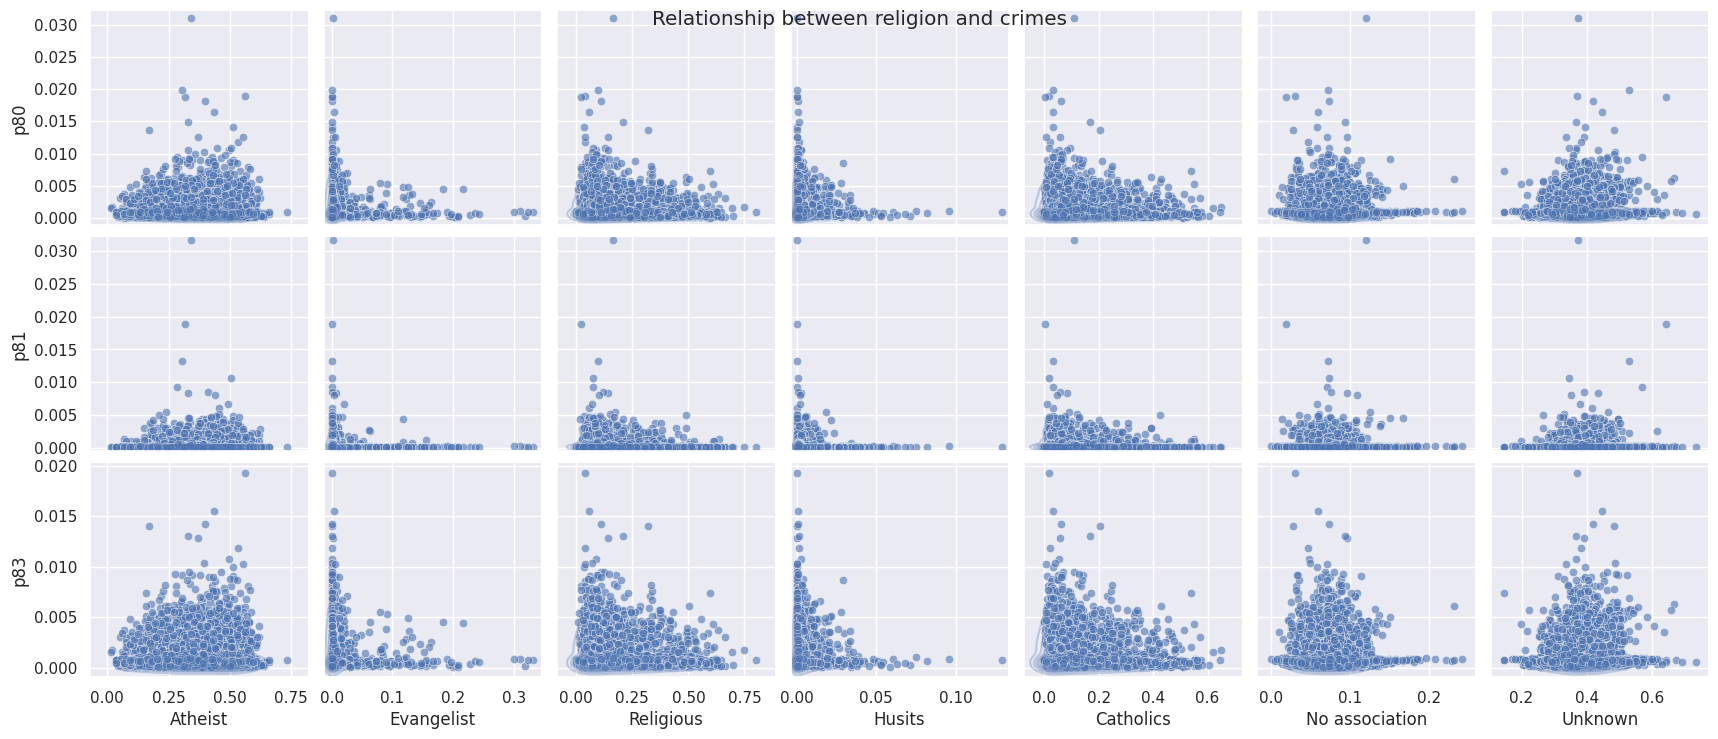

In [24]:
religion_crimi_df = religion.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
religion_groups = list(religion.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=religion_crimi_df, x_vars=religion_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between religion and crimes");

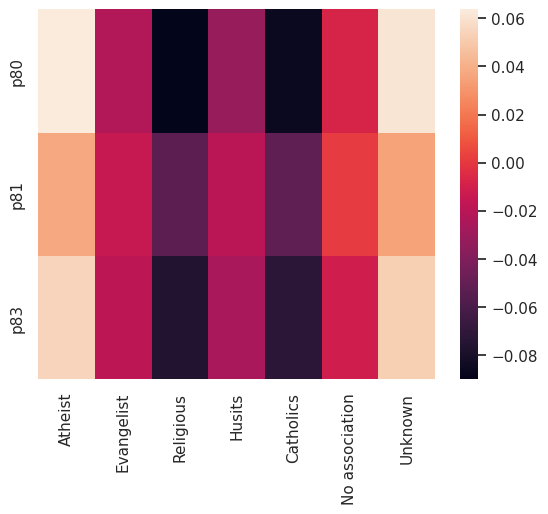

In [25]:
sns.heatmap(religion_crimi_df.corr().loc[crime_cats][religion_groups])
g.set(xlabel="Religion", ylabel="Crime",
      title="Correlation between religion and crime");

There is noticeable difference between mostly religious and mostly atheistic ares. Atheistic areas seem to have more crime than religious areas. There does not seem to be a big difference between different religious groups, however, catholicism seems to have the most positive impact on the area in terms of illicit substance use.

#### Marital Status Data Distribution

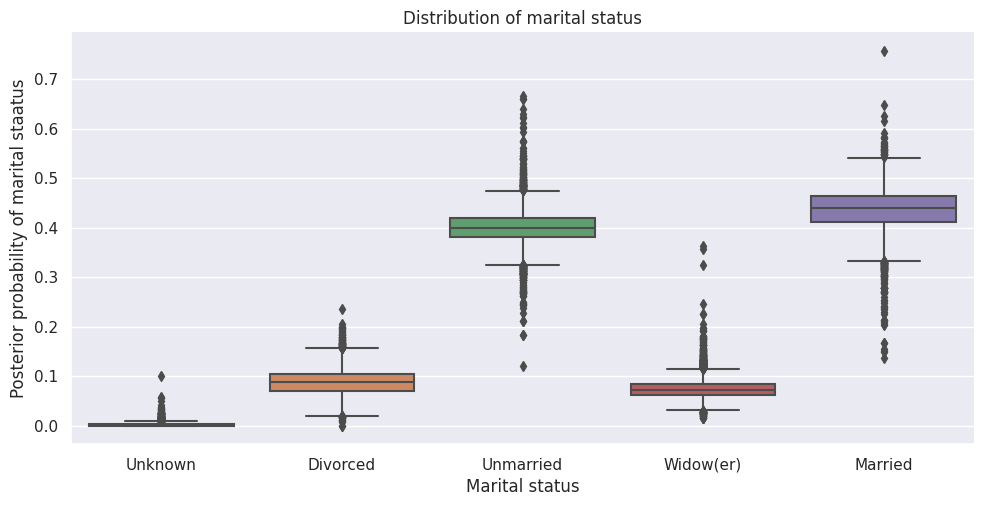

In [26]:
marital_status_m = marital_status.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                                    var_name="marital_status",
                                                                    value_name="prob")
g = sns.catplot(data=marital_status_m, x='marital_status', y='prob', kind='box',
                aspect=2)
g.set(xlabel="Marital status",
      ylabel="Posterior probability of marital staatus",
      title="Distribution of marital status");

#### Marital Status Relationships

**Questions**:
- Do areas with a lot of married people (and presumably families) contain a lot of criminal activity?
- Are unmarried people more or less prone to criminality then married people?
- Does divorce lead to criminality?
- Do widow(er)s engage in criminal activities?

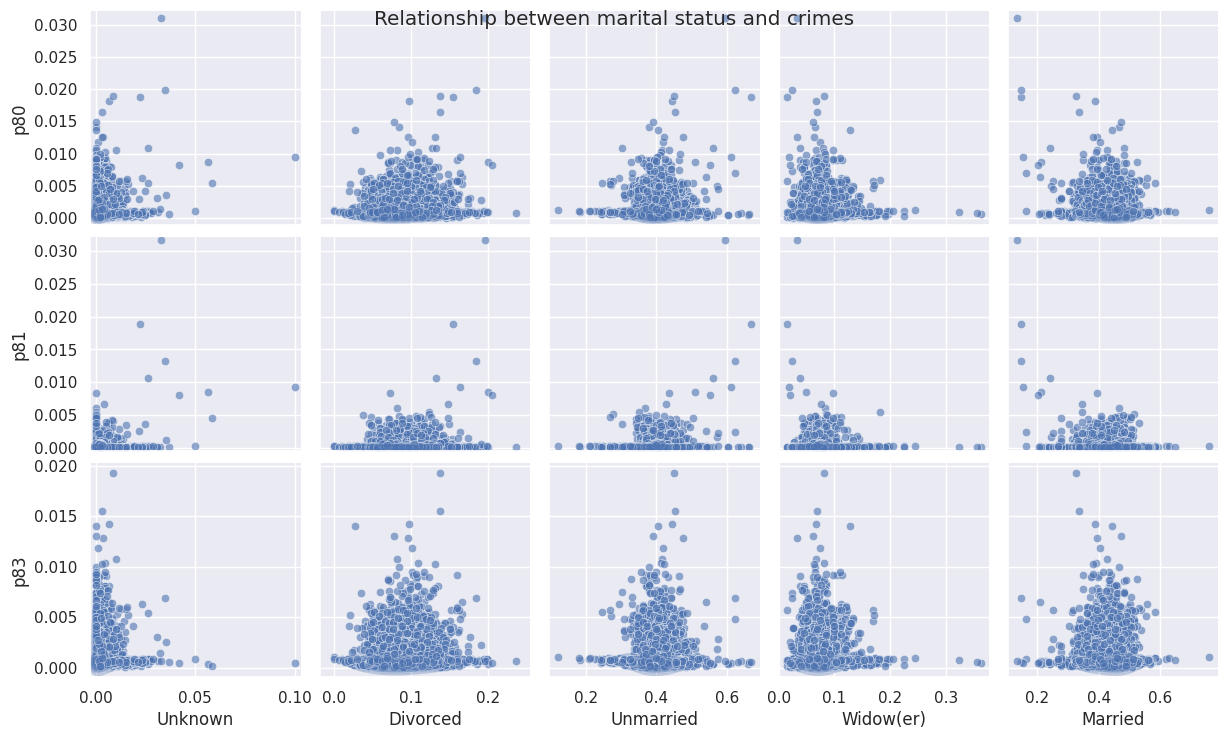

In [27]:
marital_status_crimi_df = marital_status.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
marital_status_groups = list(
    marital_status.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=marital_status_crimi_df, x_vars=marital_status_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between marital status and crimes");

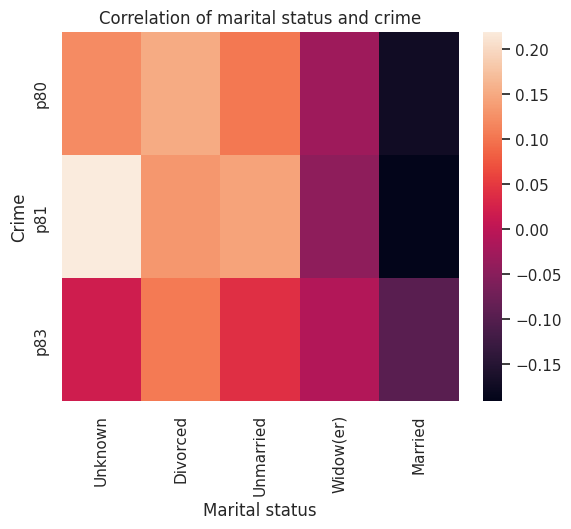

In [28]:
g = sns.heatmap(
    marital_status_crimi_df.corr().loc[crime_cats][marital_status_groups])
g.set(xlabel="Marital status", ylabel="Crime",
      title="Correlation of marital status and crime");

When comparing divorced or unmarried people with married people, there seems to be a tendency for more crime in areas where people live outside marriage. Being divorced seems to slightly increase the inclination for crime compared to being unmarried. Widowed people do not seem to be inclined to crime.

#### Education Data Distribution

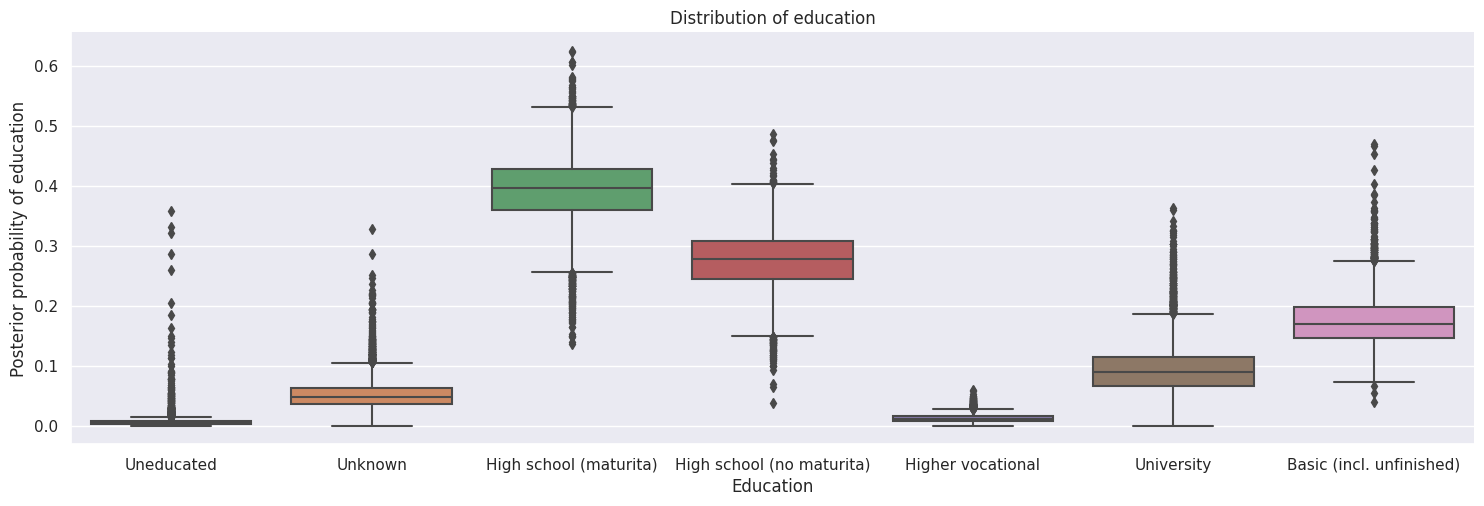

In [29]:
education_m = education.drop(["OBEC_NAZEV"], axis=1).melt("OBEC_KOD",
                                                          var_name="education",
                                                          value_name="prob")
g = sns.catplot(data=education_m, x='education', y='prob', kind='box', aspect=3)
g.set(xlabel="Education", ylabel="Posterior probability of education",
      title="Distribution of education");

#### Education Relationships

**Questions**:
- Does higher amount of educated people imply less criminal activity?
- Are less educated people more prone to criminality?

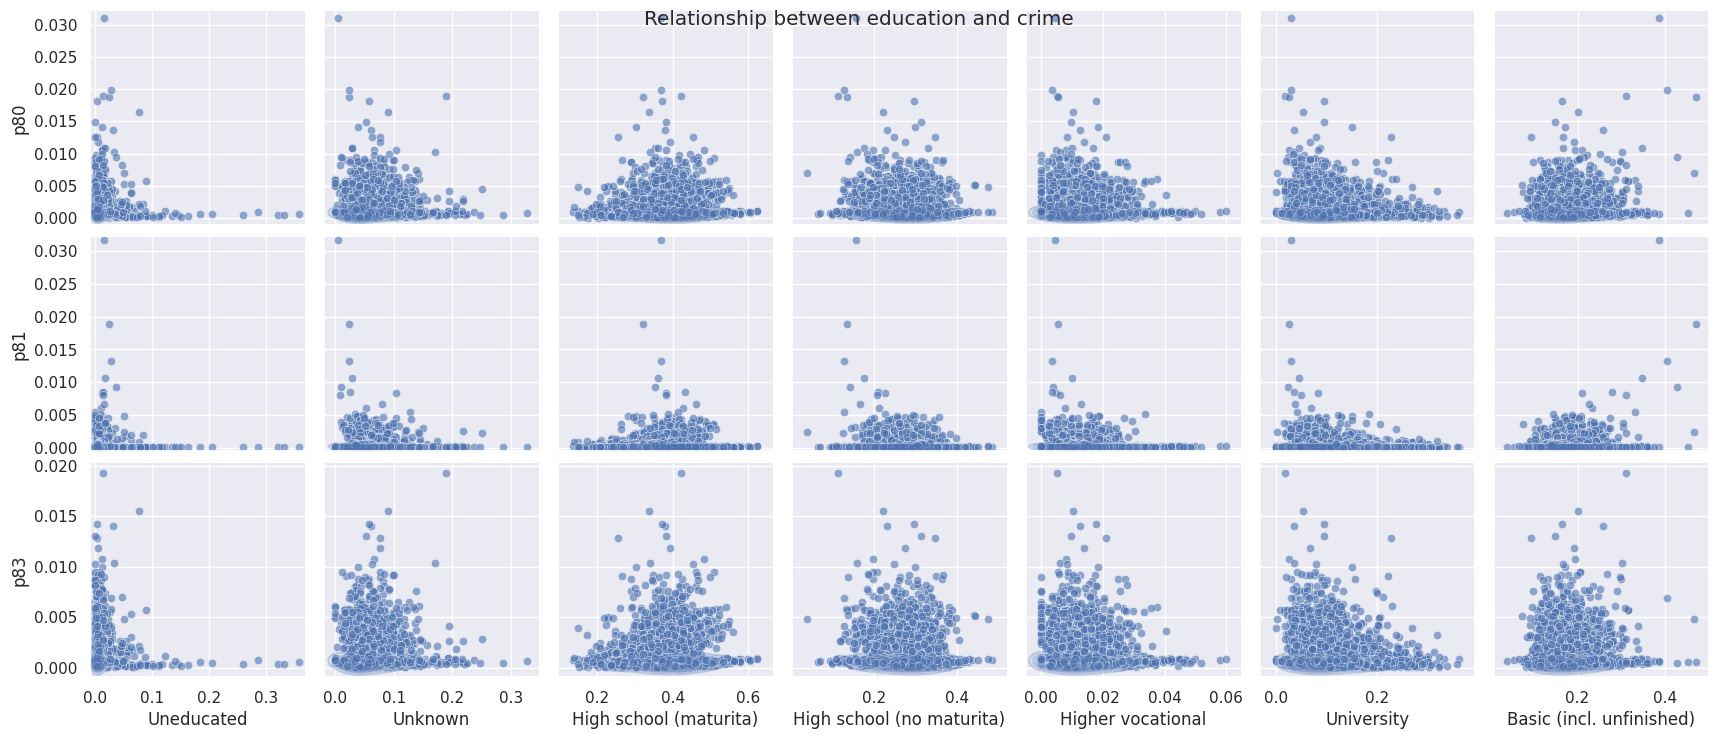

In [30]:
education_crimi_df = education.set_index('OBEC_KOD').join(
    crimi.set_index('OBEC_KOD')).drop("OBEC_NAZEV", axis=1)
education_groups = list(education.columns.drop(["OBEC_KOD", "OBEC_NAZEV"]))

g = sns.pairplot(data=education_crimi_df, x_vars=education_groups,
                 y_vars=crime_cats, plot_kws=dict(alpha=0.6))
g.map(sns.kdeplot, alpha=0.3)
g.fig.suptitle("Relationship between education and crime");

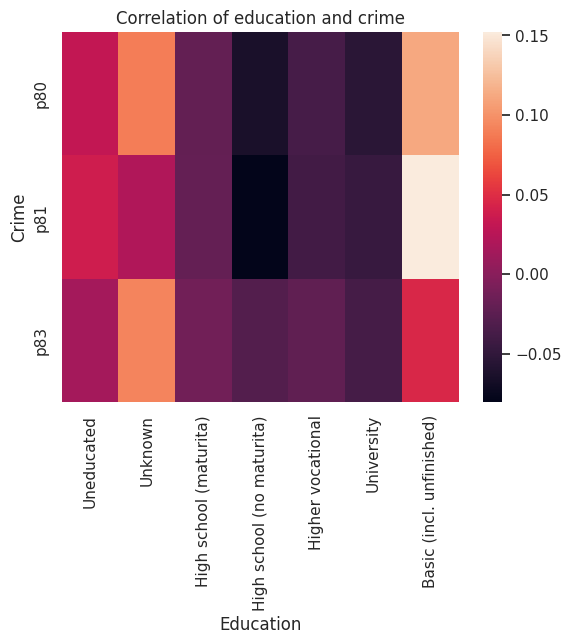

In [31]:
g = sns.heatmap(education_crimi_df.corr().loc[crime_cats][education_groups])
g.set(xlabel="Education", ylabel="Crime",
      title="Correlation of education and crime");

There seems to be a trend that the higher the education achieved, the less crime in the area. Indeed, crime seems to be correlated highest with areas with a lot of people with basic education (or none).

# Summary of exploration

The greatest predictors of criminality in the area seem to be lack of education, high concentration of people aged 20-40 atheism and to a slight degree divorce. On the other hand higher education, religion, marriage, and presence of children seems to have a detrimental effect to amount of criminality concerning illicit substance used present.

---

# Modelling

## Methodology

We will model 

In [49]:
import mlflow

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [33]:
# Initialize mlflow
%set_env MLFLOW_TRACKING_URI=http://127.0.0.1:5000

env: MLFLOW_TRACKING_URI=http://127.0.0.1:5000


In [35]:
mlflow.set_experiment("toxicomania")
mlflow.sklearn.autolog()

In [36]:
religion_crimi_df * 100

,Atheist,Evangelist,Religious,Husits,Catholics,No association,Unknown,p80,p81,p83
OBEC_KOD,,,,,,,,,,
500011,25.126451,1.460694,27.506482,0.053682,18.970998,10.410747,36.956320,0.239282,0.001895,0.238008
500020,42.259414,0.376569,13.514644,0.041841,7.573222,8.033473,36.192469,0.267708,0.002790,0.266072
500046,34.807350,0.224361,17.172621,0.032489,14.114617,9.350300,38.669729,0.076304,0.002114,0.073841
500259,27.989894,0.128008,27.375054,0.077327,21.790365,11.578522,33.056531,0.065743,0.056825,0.008560
500291,38.446830,0.405366,18.832033,0.240075,14.176004,9.224133,33.497005,0.045782,0.001265,0.044192
...,...,...,...,...,...,...,...,...,...,...
599930,39.078067,1.646938,15.472048,0.098904,7.042658,7.361638,38.088247,0.050623,0.001400,0.048884
599948,35.053203,0.900093,19.688107,0.090009,14.217903,9.369617,35.889073,0.170327,0.001087,0.169370
599956,28.662242,0.289836,23.475018,0.086750,17.895508,9.341279,38.521461,0.132638,0.062611,0.070037


In [47]:
# Try simple linear regression on one category
religion_crimi_df_train, religion_crimi_df_test = train_test_split(
    religion_crimi_df * 100,
    train_size = 0.7, 
    test_size = 0.3,
)

categories = ["p80", "p81", "p83"] 
y_train, X_train, y_test, X_test = {}, {}, {}, {}
for cat in categories:
    y_train[cat] = religion_crimi_df_train[cat]
    X_train[cat] = religion_crimi_df_train[["Atheist"]]

    y_test[cat] = religion_crimi_df_test[cat]
    X_test[cat] = religion_crimi_df_test[religion_groups]

# fit model
model = {}
for cat in categories:
    lm = LinearRegression()
    lm.fit(X_train[cat], y_train[cat])
    model[cat] = lm


# get coefficients
for cat in categories:
    print(f'Intercept {cat}: ', model[cat].intercept_)
    print(f'Beta coefficients {cat}: ', model[cat].coef_)

2023/01/17 17:04:10 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'e1bf6f702bf24bd29c80964809bed112', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:04:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd0db36c678714abe8ee3bbeb59542709', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:04:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b6616fc73ea8478589205ef0920aad90', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Intercept p80:  -5.047895369547542
Beta coefficients p80:  [ 0.05160872 -0.00118153  0.051187   -0.01148405 -0.00083289  0.05292319
  0.05241547]
Intercept p81:  -1.8945057498086317
Beta coefficients p81:  [ 0.01911931 -0.00068364  0.01924564 -0.00358767 -0.00053862  0.01969569
  0.01933223]
Intercept p83:  -3.4073434385318824
Beta coefficients p83:  [ 0.03503188 -0.00056032  0.03448346 -0.00803779 -0.00033137  0.03576372
  0.03563922]


In [62]:
# Try simple linear regression on one category
religion_crimi_df_train, religion_crimi_df_test = train_test_split(
    religion_crimi_df * 100,
    train_size = 0.7, 
    test_size = 0.3,
)

categories = ["p80", "p81", "p83"] 
y_train, X_train, y_test, X_test = {}, {}, {}, {}
for cat in categories:
    y_train[cat] = religion_crimi_df_train[cat]
    X_train[cat] = religion_crimi_df_train[religion_groups]

    y_test[cat] = religion_crimi_df_test[cat]
    X_test[cat] = religion_crimi_df_test[religion_groups]

# fit model
model = {}
for cat in categories:
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=4)
    pipe_params = [('rfe', rfe), ('lm', lm)]
    m = Pipeline(pipe_params)
    m.fit(X_train[cat], y_train[cat])
    model[cat] = m


# get coefficients
for cat in categories:
    print(f'Intercept {cat}: ', model[cat].named_steps['lm'].intercept_)
    print(f'Beta coefficients {cat}: ', model[cat].named_steps['lm'].coef_)
    print(X_train[cat].columns[model[cat].named_steps['rfe'].support_])
    
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    scores = cross_val_score(model[cat], X_test[cat], y_test[cat], scoring='r2', cv=folds)
    print(scores) 

2023/01/17 17:28:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '14d85d8bc58048f283c7954d4f325b02', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:28:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a0ce04e2b4a7463eb08573c8ddaef1a3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:28:33 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '58d6b892594d4415912a15a6821d7d0f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Intercept p80:  -4.762954815398113
Beta coefficients p80:  [0.04889893 0.047811   0.04980506 0.04935804]
Index(['Atheist', 'Religious', 'No association', 'Unknown'], dtype='object')
[ 0.01693665  0.01947948 -0.01030691 -0.02173713 -0.00597073]
Intercept p81:  -1.944706250621954
Beta coefficients p81:  [0.01981193 0.01948926 0.01984037 0.01961047]
Index(['Atheist', 'Religious', 'No association', 'Unknown'], dtype='object')
[ 0.00105806  0.01490383 -0.07909444 -0.00649747 -0.00687663]
Intercept p83:  -2.9881162224240616
Beta coefficients p83:  [0.03079381 0.02999831 0.03169385 0.03144578]
Index(['Atheist', 'Religious', 'No association', 'Unknown'], dtype='object')
[ 0.00158376  0.01078668 -0.00140727 -0.03477633 -0.0105082 ]


In [64]:
# Use polynomial features
# Try simple linear regression on one category
religion_crimi_df_train, religion_crimi_df_test = train_test_split(
    religion_crimi_df * 100,
    train_size = 0.7, 
    test_size = 0.3,
)

categories = ["p80", "p81", "p83"] 
y_train, X_train, y_test, X_test = {}, {}, {}, {}
for cat in categories:
    y_train[cat] = religion_crimi_df_train[cat]
    X_train[cat] = religion_crimi_df_train[religion_groups]

    y_test[cat] = religion_crimi_df_test[cat]
    X_test[cat] = religion_crimi_df_test[religion_groups]

# fit model
model = {}
for cat in categories:
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=4)
    poly = PolynomialFeatures(degree=3)
    pipe_params = [('poly_features', poly), ('rfe', rfe), ('lm', lm)]
    m = Pipeline(pipe_params)
    m.fit(X_train[cat], y_train[cat])
    model[cat] = m


# get coefficients
for cat in categories:
    print(f'Intercept {cat}: ', model[cat].named_steps['lm'].intercept_)
    print(f'Beta coefficients {cat}: ', model[cat].named_steps['lm'].coef_)
    # print(columns[model[cat].named_steps['rfe'].support_])
    
    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    scores = cross_val_score(model[cat], X_test[cat], y_test[cat], scoring='r2', cv=folds)
    print(scores) 

2023/01/17 17:31:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '51c50247b56c4331947968a24289f8a7', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:31:29 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ecc54dfd7024492693a26de1c5e28e7c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/01/17 17:31:37 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '326e46a2846d47d68715a1de08fca31c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Intercept p80:  -4.120542679178455
Beta coefficients p80:  [0.04201254 0.04095664 0.04346309 0.0435313 ]
[-0.01896148  0.01290727 -0.00328296 -0.00395193  0.00552324]
Intercept p81:  0.025109465299727428
Beta coefficients p81:  [-0.02862307  0.00011423  0.00095442  0.00037804]
[ 0.00142017  0.00485978 -0.00179253 -0.00333097 -0.01183994]
Intercept p83:  -2.797970084215156
Beta coefficients p83:  [0.02873812 0.02795799 0.02938636 0.02979637]
[-0.05041     0.00762347 -0.00230193 -0.00908697  0.00187529]


In [39]:
# Try linear regression on two categories using linear regression

In [40]:
# Try using polynomial features combining categories

In [41]:
# Try linear regression using bayesian statistics ???

In [42]:
# Try regression using all categories, how good is the prediction, RFE select features